In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import os
import glob
import csv
from tqdm.notebook import tqdm as tqdm
import cv2
import  matplotlib.pyplot  as plt

In [2]:
dict_train_videos_frames = {}
for i in glob.glob('/export/home/data/PartHuman/train_videos_frames/'+'/*'*2):
    dict_train_videos_frames[i.split('/')[-1]] = i

In [3]:
train_csv_path = '/export/home/data/PartHuman_as_AVA/annotations/ava_train_v2.1_with_name.csv'

In [4]:
csv_row_train_set = set()
with open(train_csv_path, 'r') as f:
    reader_train = csv.reader(f)
    print(type(reader_train))
    for row in reader_train:
        row[0] = dict_train_videos_frames[row[0]]
        csv_row_train_set.add(os.path.join(row[0],'img_'+row[1].zfill(5)+'.jpg'))
csv_row_train_list = sorted(list(csv_row_train_set))
csv_row_train_list

<class '_csv.reader'>


['/export/home/data/PartHuman/train_videos_frames/belly_dancing/-7tDxxH2g6I_000016_000026/img_00001.jpg',
 '/export/home/data/PartHuman/train_videos_frames/belly_dancing/-7tDxxH2g6I_000016_000026/img_00006.jpg',
 '/export/home/data/PartHuman/train_videos_frames/belly_dancing/-7tDxxH2g6I_000016_000026/img_00011.jpg',
 '/export/home/data/PartHuman/train_videos_frames/belly_dancing/-7tDxxH2g6I_000016_000026/img_00016.jpg',
 '/export/home/data/PartHuman/train_videos_frames/belly_dancing/-7tDxxH2g6I_000016_000026/img_00021.jpg',
 '/export/home/data/PartHuman/train_videos_frames/belly_dancing/-7tDxxH2g6I_000016_000026/img_00026.jpg',
 '/export/home/data/PartHuman/train_videos_frames/belly_dancing/-7tDxxH2g6I_000016_000026/img_00031.jpg',
 '/export/home/data/PartHuman/train_videos_frames/belly_dancing/-7tDxxH2g6I_000016_000026/img_00036.jpg',
 '/export/home/data/PartHuman/train_videos_frames/belly_dancing/-7tDxxH2g6I_000016_000026/img_00041.jpg',
 '/export/home/data/PartHuman/train_videos_fra

In [5]:
config_file_human = '/export/home/cxd/202107/mmdet-202108/work_dirs/yolof_r101_c5_4x6_2x_coco/yolof_r101_c5_8x8_1x_coco.py'
checkpoint_file_human = '/export/home/cxd/202107/mmdet-202108/work_dirs/yolof_r101_c5_4x6_2x_coco/epoch_17.pth'

In [6]:
config_file_part = '/export/home/cxd/202107/mmdet-202108/work_dirs/yolof_r101_c5_4x6_2x_coco_part_woR/yolof_r101_c5_8x8_1x_coco.py'
checkpoint_file_part = '/export/home/cxd/202107/mmdet-202108/work_dirs/yolof_r101_c5_4x6_2x_coco_part_woR/epoch_18.pth'

In [7]:
model_human = init_detector(config_file_human, checkpoint_file_human, device='cuda:0')

/export/home/cxd/anaconda3/envs/mmaction/lib/python3.7/site-packages/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [8]:
model_part = init_detector(config_file_part, checkpoint_file_part, device='cuda:1')

Use load_from_local loader


In [ ]:
# imgs_human = [cv2.imread(i) for i in csv_row_train_list[0:8]]

In [ ]:
# result_human = inference_detector(model_human, imgs_human)

In [ ]:
# show_result_pyplot(model_human, imgs_human[0], result_human[0])
# result_human[0][0][0]

In [ ]:
# x1,y1,x2,y2,score = result_human[0][0][0]
# x1,y1,x2,y2 = map(int,[x1,y1,x2,y2])
# print(x1,y1,x2,y2)
# plt.imshow(imgs_human[0][y1:y2,x1:x2][:,:,::-1])
# plt.show()

In [9]:
def inference_detector_part(model,imgs):
    return inference_detector(model, imgs)

In [10]:
from collections import defaultdict

In [11]:
import  mmcv.ops.nms as nms
import numpy as np
np.set_printoptions(precision = 3)

  0%|          | 0/453676 [00:00<?, ?it/s]

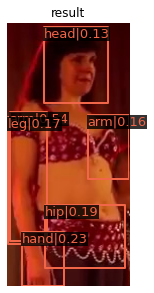

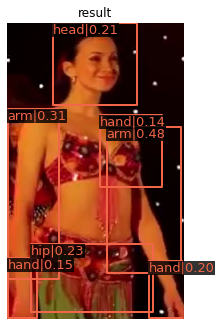

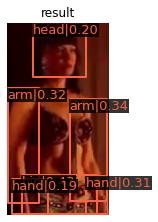

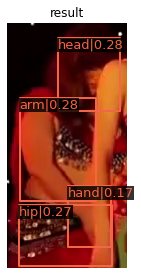

In [13]:
# test a single image
dict_result_human = defaultdict(list)
batch_one = 1
for i in tqdm(range(0,len(csv_row_train_list),batch_one)):
    
    imgs_human_path = csv_row_train_list[i:i+batch_one]
    imgs_human = [cv2.imread(j) for j in imgs_human_path]
    result_human = inference_detector(model_human, imgs_human)
    for j,img_path in enumerate(imgs_human_path):
        dict_result_human_key = img_path.split('/')[-2] + ','+str(int(img_path.split('/')[-1][-9:-4]))
        dict_result_human_value = []
        img_human_h,img_human_w, _ = imgs_human[j].shape
        #print(dict_result_human_key)
        
        store_xys = []
        img_parts = []
        for single in result_human[j][0]:
            x1,y1,x2,y2,score = single
            if score >= 0.3:
                x1,y1,x2,y2 = map(int,[x1,y1,x2,y2])
               # print(x1,y1,x2,y2,f"{score}"[:5])
                store_xys.append(tuple([x1,y1,x2,y2]))
                img_parts.append(imgs_human[j][y1:y2,x1:x2])
                

        #cv2.imwrite('./demo.jpg',imgs_human[j][y1:y2,x1:x2])
        #for img_part in 
        results_part = []
        for i_img_part in range(0,len(img_parts),batch_one):
            results_part.extend(inference_detector_part(model_part,img_parts[i_img_part:i_img_part+batch_one]))
                                
        #print(results_part)                        
        for no_result_part,result_part in enumerate(results_part):
            #result_part = [ i if i.shape[0] == 0 else i[0:1,:] for i in result_part]
            #print(result_part)
            x1,y1,x2,y2 = store_xys[no_result_part]
            result_part_nms = []
            for re in result_part:
                if len(re) == 0:
                    result_part_nms.append(re)
                else:
                    dets, inds = nms(re[:,:-1],re[:,-1],iou_threshold=0.05,score_threshold=0.1)
                    result_part_nms.append(re[inds,:])

            show_result_pyplot(model_part, img_parts[no_result_part], result_part_nms,score_thr=0.1)
            for part_i in result_part_nms:
                for part_j in part_i:
                    part_j_clone = part_j.copy().tolist()
                    part_j_clone[0] = (part_j_clone[0]+x1)/img_human_w
                    part_j_clone[2] = (part_j_clone[2]+x1)/img_human_w
                    part_j_clone[1] = (part_j_clone[1]+y1)/img_human_h
                    part_j_clone[3] = (part_j_clone[3]+y1)/img_human_h
                    dict_result_human[dict_result_human_key].append(part_j_clone)
                
                #plt.imshow(imgs_human[j][y1:y2,x1:x2][:,:,::-1])
                #plt.show()        /export/home/cxd/202107/mmdet-202108/demo_for_AVA/demo.jpg
        #print(dict_result_human_key)
        dict_result_human[dict_result_human_key] = np.asarray( dict_result_human[dict_result_human_key])
    break

In [ ]:
# 2）使用pickle模块存储对象
import pickle

data1 = dict(dict_result_human) # data1是一个字典


output = open('/export/home/data/PartHuman_as_AVA/annotations/ava_dense_proposals_train.FAIR.recall_93.9.pkl', 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(data1, output)


output.close()

In [ ]:
# import pickle
# file=open('/export/home/data/PartHuman_as_AVA/annotations/ava_dense_proposals_train.FAIR.recall_93.9.pkl',"rb")
# data=pickle.load(file)
# file.close()
# data